# Employee Attrition Prediction and Analysis
This notebook analyzes employee attrition using a predictive modeling approach. It involves:
- Data Exploration
- Data Preprocessing
- Model Building and Evaluation
- Key Insights and Visualizations

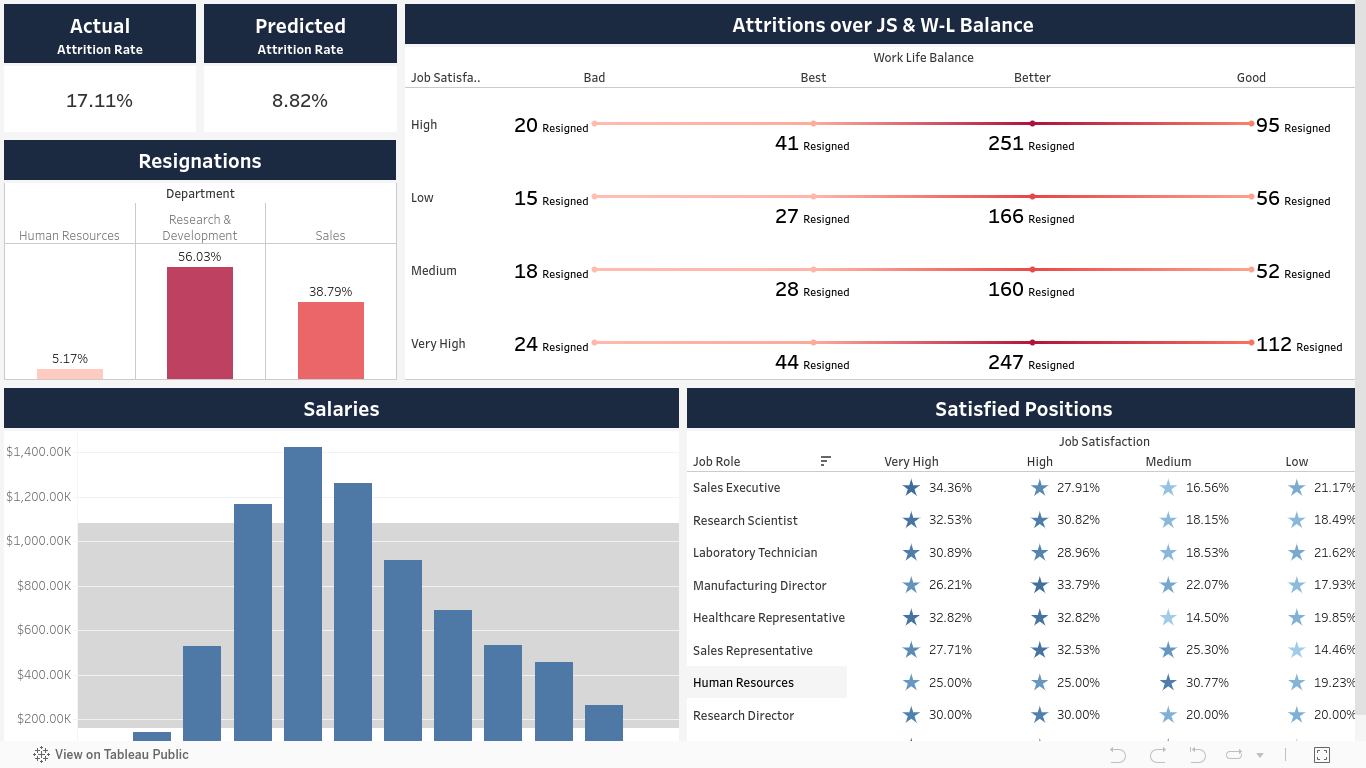

[Visualization](https://public.tableau.com/app/profile/ateeq.aslam/viz/EmployeeAttritionPredictionandAnalysis/Dashboard1)

## Table of Contents
1. [Introduction](#scrollTo=pM2dGP4NF7BZ)
2. [Data Preprocessing](#scrollTo=Q5WenEPBkuxQ)
3. [Feature Engineering](#scrollTo=XfzIu4yysJ1M)
4. [Model Building and Evaluation](#scrollTo=2yzGnEvP0qUy)


## Introduction
Employee attrition is a critical issue in organizational management. This project aims to:
1. Identify key factors influencing employee attrition.
2. Build a predictive model to forecast potential attrition.
3. Provide actionable insights for HR management.

**Dataset**: A synthetic dataset containing employee demographic, performance, and attrition-related features.


###**Data Collection & Preparation**
####This section covers the essential steps in data ingestion, exploration, and preprocessing. We begin by loading the dataset from Google Drive and performing an initial inspection to understand its structure and identify any potential issues. Columns that are unnecessary or require transformation are addressed, such as converting integer-encoded fields into more interpretable categorical labels. Additionally, outlier detection is performed using the Interquartile Range (IQR) method to ensure the integrity of the 'MonthlyIncome' feature. These data preparation steps are crucial for ensuring a clean, consistent dataset that is ready for in-depth analysis and modeling.


In [1]:
# Mounting Google Drive to access files stored in it
from google.colab import drive
drive.mount('/content/drive')
# Defining the file path of the dataset stored in Google Drive
path = '/content/drive/My Drive/Advance Projects/Employee Attrition Prediction and Analysis/WA_Fn-UseC_-HR-Employee-Attrition.csv'

Mounted at /content/drive


In [2]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Loading the dataset into a pandas DataFrame from the specified CSV file
data = pd.read_csv(path)
# Setting pandas options to display all columns in the DataFrame without truncation
pd.set_option('display.max_columns', None)
# Displaying the first 10 rows of the dataset to get an overview of the data
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [3]:
# Displaying summary information about the dataset including column types and non-null counts
print(data.info())
# Displaying the shape of the dataset, i.e., the number of rows and columns
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Calculating the number of unique values in each column of the dataset
data.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [5]:
# Converting integer-coded columns to categorical labels for better clarity
# Note: Values are mapped based on the original dataset author's Kaggle input
data['Education'] = data['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
data['JobInvolvement'] = data['JobInvolvement'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
data['JobSatisfaction'] = data['JobSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
data['PerformanceRating'] = data['PerformanceRating'].replace({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'})

# Displaying the updated DataFrame to confirm the changes
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,1,8,Very High,Male,79,High,1,Laboratory Technician,Very High,Single,3068,11864,0,Y,No,13,Excellent,High,80,0,8,2,Good,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,1,10,High,Female,81,Very High,1,Laboratory Technician,Low,Married,2670,9964,4,Y,Yes,20,Outstanding,Low,80,3,12,3,Good,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,Below College,Life Sciences,1,11,Very High,Male,67,High,1,Laboratory Technician,High,Divorced,2693,13335,1,Y,No,22,Outstanding,Medium,80,1,1,2,Better,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,Bachelor,Life Sciences,1,12,Very High,Male,44,Medium,3,Manufacturing Director,High,Single,9526,8787,0,Y,No,21,Outstanding,Medium,80,0,10,2,Better,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,Bachelor,Medical,1,13,High,Male,94,High,2,Healthcare Representative,High,Married,5237,16577,6,Y,No,13,Excellent,Medium,80,2,17,3,Good,7,7,7,7


In [6]:
# Dropping the 'EmployeeCount' column as it is deemed unnecessary for the analysis
data.drop(labels={'EmployeeCount'}, axis=1, inplace=True)
# Repositioning the 'EmployeeNumber' column to the first position for easier reference
data.insert(0, "EmployeeNumber", data.pop('EmployeeNumber'))

# Displaying the updated DataFrame to confirm changes
data.head()

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,4,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,5,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,7,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2


<ipython-input-7-7ac7accaad80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['MonthlyIncome'], data=data, palette='Set2')


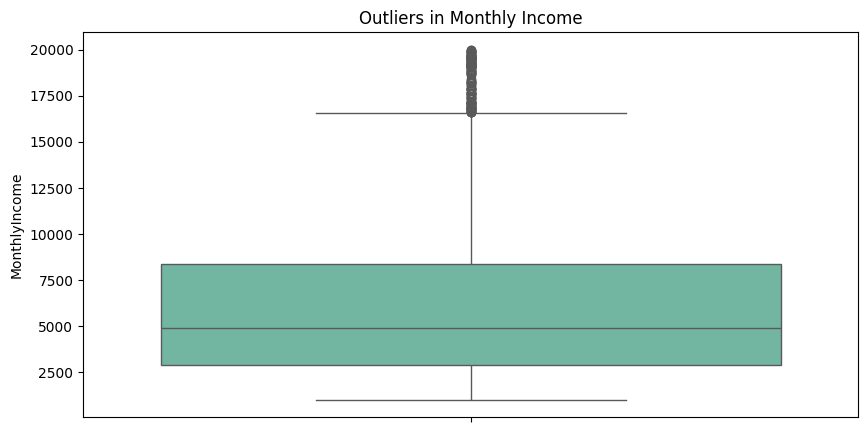

(1470, 34)

In [7]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a boxplot to visualize outliers in the 'MonthlyIncome' column
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['MonthlyIncome'], data=data, palette='Set2')
plt.title("Outliers in Monthly Income")
plt.show()

# Displaying the shape of the dataset to understand its current dimensions
data.shape

In [8]:
# Calculating the first (Q1) and third (Q3) quartiles of 'MonthlyIncome' to detect outliers using the IQR method
Q1 = data['MonthlyIncome'].quantile(0.25)
Q3 = data['MonthlyIncome'].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1
# Defining the lower and upper bounds for outlier detection using the IQR method
lower_band = Q1 - 1.5 * IQR
upper_band = Q3 + 1.5 * IQR
# Filtering the data to exclude outliers outside the defined bounds
data = data[(data['MonthlyIncome'] > lower_band) & (data['MonthlyIncome'] < upper_band)]

# Displaying the new shape of the dataset after removing outliers
data.shape

(1356, 34)

###Feature Engineering & Data Spliting
####In this section, we focus on preparing the features for modeling and splitting the data into training and testing sets. First, we identify numerical and categorical features in the dataset. Numerical features are directly usable, while categorical variables are encoded using techniques like Label Encoding for the target variable and One-Hot Encoding for other categorical features. We then scale the numerical features using StandardScaler to ensure they have a consistent range and unit variance, which is important for many machine learning algorithms. Finally, we split the dataset into training and testing subsets to evaluate the model’s performance on unseen data. These steps lay the foundation for building a robust machine learning model.


In [9]:
# Displaying a summary of the dataset including column types, non-null counts, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1356 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1356 non-null   int64 
 1   Age                       1356 non-null   int64 
 2   Attrition                 1356 non-null   object
 3   BusinessTravel            1356 non-null   object
 4   DailyRate                 1356 non-null   int64 
 5   Department                1356 non-null   object
 6   DistanceFromHome          1356 non-null   int64 
 7   Education                 1356 non-null   object
 8   EducationField            1356 non-null   object
 9   EnvironmentSatisfaction   1356 non-null   object
 10  Gender                    1356 non-null   object
 11  HourlyRate                1356 non-null   int64 
 12  JobInvolvement            1356 non-null   object
 13  JobLevel                  1356 non-null   int64 
 14  JobRole                   135

**Feature Identification**

In this section, we categorize the features of the dataset into numerical and categorical variables.

**Numerical Features (these can be used directly):**
- These features represent continuous or ordinal variables that can be used directly for modeling. They include metrics such as `Age`, `DailyRate`, `DistanceFromHome`, `MonthlyIncome`, and others that are numerical in nature.

**Categorical Features (these will need to be encoded):**
- These variables represent categories or labels that need to be encoded into numerical format before they can be used in machine learning models. Key categorical features include `Attrition` (the target variable), `BusinessTravel`, `Department`, `Education`, and others that represent distinct groups or classes.

Identifying and categorizing these features is a critical step in preparing the dataset for encoding, transformation, and modeling.

In [10]:
# Importing necessary encoders for transforming categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Target Variable: 'Attrition' which needs to be encoded
y = data['Attrition']
# Encoding the target variable using LabelEncoder (for binary or ordinal categories)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# List of categorical features that require encoding
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
                    'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating',
                    'RelationshipSatisfaction', 'WorkLifeBalance']

# Initializing the OneHotEncoder to handle the categorical features (dropping the first category to avoid multicollinearity)
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Encoding the categorical features and storing them in X
X = encoder.fit_transform(data[categorical_cols])

# Printing the data type of the encoded features to confirm the transformation
print(X.dtype)

float64


In [11]:
# Importing train_test_split to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets with 80% for training and 20% for testing
# random_state is set for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Importing StandardScaler for feature scaling to standardize the features
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scalar = StandardScaler()
# Fitting and transforming the training data to scale the features to zero mean and unit variance
X_train = scalar.fit_transform(X_train)
# Transforming the test data using the same scaler to ensure consistency with the training data
X_test = scalar.transform(X_test)

In [13]:
# Importing GridSearchCV for hyperparameter tuning and LogisticRegression for model training
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Defining the hyperparameter grid to search over for different solvers, penalties, and regularization strengths
grid = [
    # For 'liblinear' solver
    {
        'solver': ['liblinear'],
        'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
        'penalty': ['l1', 'l2']  # Regularization types
    },
    # For 'saga' solver
    {
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2', 'elasticnet'],  # Adding elasticnet penalty
        'l1_ratio': [0.5]  # L1 ratio for elasticnet
    },
    # For 'lbfgs' and 'newton-cg' solvers
    {
        'solver': ['lbfgs', 'newton-cg'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l2']  # Only L2 penalty for these solvers
    }
]

# Setting up GridSearchCV to tune hyperparameters, using 5-fold cross-validation and F1 scoring metric
grid_search = GridSearchCV(LogisticRegression(), grid, cv=5, scoring='f1', n_jobs=-1)

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


####Extracting cleaned Dataset for EDA on Tableau
####In this section, the cleaned dataset is exported to an Excel file, making it ready for exploratory data analysis (EDA) in Tableau. This allows for efficient visualization and further insights extraction from the data.

In [14]:
# Exporting the cleaned dataset to an Excel file for further exploration in Tableau
data.to_excel('/content/drive/My Drive/Advance Projects/Employee Attrition Prediction and Analysis/Cleaned_Data.xlsx',
               index=False,  # Avoid writing row indices
               sheet_name='Cleaned_Data')  # Naming the sheet for clarity

###Model Building and Evaluation
####In this section, we built and trained a Logistic Regression model to predict employee attrition. After evaluating both the initial and optimized models, we observed that the best model achieved the following performance metrics on the test set:
 - **Prediction Accuracy**: 0.87
 - **Precision Score**: 0.74
 - **F1 Score**: 0.53

###These metrics highlight the model's ability to accurately predict attrition, though there is room for improvement, especially in terms of balancing precision and recall. The predicted dataset was then exported for further analysis and visualization in Tableau.


In [15]:
# Initializing and training the Logistic Regression model
model = LogisticRegression()

# Fitting the model on the training data (X_train, y_train)
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Importing evaluation metrics for model performance assessment
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Training and predicting with the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Making predictions with the best model
best_prediction = best_model.predict(X_test)

# Evaluating the performance of the best model
print('Prediction Accuracy:', accuracy_score(y_test, best_prediction))
print('Precision Score:', precision_score(y_test, best_prediction))
print('F1 Score:', f1_score(y_test, best_prediction))

Prediction Accuracy: 0.8713235294117647
Precision Score: 0.7407407407407407
F1 Score: 0.5333333333333333


In [17]:
# Selecting EmployeeNumber (x) and Attrition (y) for creation of new dataframe
x = data.iloc[:, 0]  # EmployeeNumber
y = data.iloc[:, 2]  # Attrition

# Splitting the dataset into training and testing sets to create a new predicted dataframe for Tableau visualization
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a DataFrame to hold actual and predicted Attrition values for visualization
Prediction_Attrition = pd.DataFrame({
    'EmployeeNumber': x1_test,
    'Attrition (Actual)': y1_test,
    'Attrition (Predicted)': best_prediction
})

# Replacing the numeric predictions (0, 1) with categorical values ('No', 'Yes') for clarity
Prediction_Attrition['Attrition (Predicted)'] = Prediction_Attrition['Attrition (Predicted)'].replace({0: 'No', 1: 'Yes'})

In [18]:
# Exporting the predicted dataset to an Excel file for visualization in Tableau
Prediction_Attrition.to_excel('/content/drive/My Drive/Advance Projects/Employee Attrition Prediction and Analysis/Predicted_Attrition.xlsx',
                              index=False,  # Avoid writing row indices
                              sheet_name='Predicted_Attrition')  # Naming the sheet for clarity